# Прототип рекомендательной системы

In [55]:
import networkx as nx
import matplotlib.pyplot as plt

In [3]:
buyer = {"name":"Alex", "wished_characteristics":["A", "B", "C", "D", "E"]}

sellers = [
    {"name":"Ben", "suggesting":["A", "B", "C", "D", "E"]},
    {"name":"Joe", "suggesting":["A", "B", "C", "D", "Z"]},
    {"name":"John", "suggesting":["A", "B", "C", "Y", "Z"]},
    {"name":"Mike", "suggesting":["A", "B", "X", "Y", "Z"]},
    {"name":"Lin", "suggesting":["A", "W", "X", "Y", "Z"]},
    {"name":"Bob", "suggesting":["V", "W", "X", "Y", "Z"]}
]

In [36]:
G = nx.Graph()
G.add_node(buyer["name"], bipartite=0)

for seller in sellers:
    G.add_node(seller["name"], 
               suggestions=seller["suggesting"], 
               bipartite=1)

graph_seller_nodes = list(G.nodes)[1:]
graph_seller_nodes

['Ben', 'Joe', 'John', 'Mike', 'Lin', 'Bob']

In [37]:
G.nodes["Ben"]

{'suggestions': ['A', 'B', 'C', 'D', 'E'], 'bipartite': 1}

In [38]:
# простая логика вычисления весов для демонстрации
for seller in graph_seller_nodes:
    calc_weight = 5 - len(set(buyer["wished_characteristics"]) 
                          - set(G.nodes[seller]["suggestions"]))
    G.add_edge(buyer["name"], seller, weight=calc_weight)

In [47]:
pos = nx.bipartite_layout(G, nx.bipartite.sets(G)[0], align="horizontal")
edge_labels = {(u, v): G[u][v]['weight'] for u, v in G.edges()}
nx.draw(G, pos, with_labels=True, node_size=3000, node_color='lightblue',
         font_weight='bold', font_size=12)
nx.draw_networkx_edges(G, pos, width=3)
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, 
                             font_color='red', font_size=15, 
                             font_weight='bold')
plt.title('Граф покупателя и продавцов')
plt.show()

In [54]:
pagerank_scores = nx.pagerank(G, alpha=0.85, 
                              weight="weight", tol=0.00001)
recommendations = sorted(pagerank_scores.items(), 
                         key=lambda x: x[1], reverse=True)
print("Рекомендуемые продавцы покупателю")
for seller, score in recommendations:
    if seller != buyer["name"]:
        print(f"Продавец: {seller}, PageRank значение: {score:.5f}")

Рекомендуемые продавцы покупателю
Продавец: Ben, PageRank значение: 0.15513
Продавец: Joe, PageRank значение: 0.12898
Продавец: John, PageRank значение: 0.10283
Продавец: Mike, PageRank значение: 0.07668
Продавец: Lin, PageRank значение: 0.05054
Продавец: Bob, PageRank значение: 0.02439


# Сущности процесса

## Грузопервозчик

Параметры машины

- Маршрут (две координаты, полученные из апи карт; названия населенных пунктов (?))
- Тип контейнера (обычный, рефрижератор и тд)
- Размер контейнера (длина, высота, ширина)
- Тоннаж
- Цена перевозки
- Дата и время отправки
- Дата и время прибытия
- Тип погруки (боковая, задняя, верхняя)
- Регулярность
- Занятость

## Грузоотправитель

Параметры груза

- Маршрут
- Потребность в охлаждении (обобщить в тип груза (?))
- Размер груза (длина, ширина, высота)
- Тоннаж
- Желаемая дата и время отправки
- Желаемая дата и время прибытия 
- Прайс вилка
- Потребность в регулярной перевозке (?)

# Архитектура

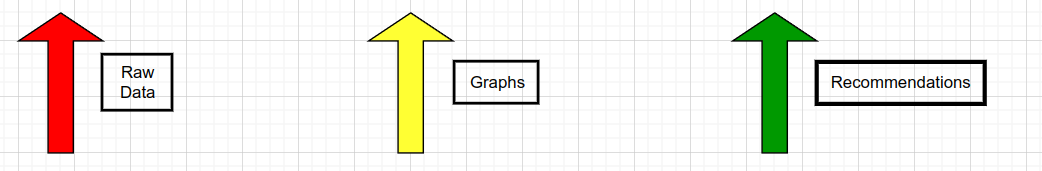

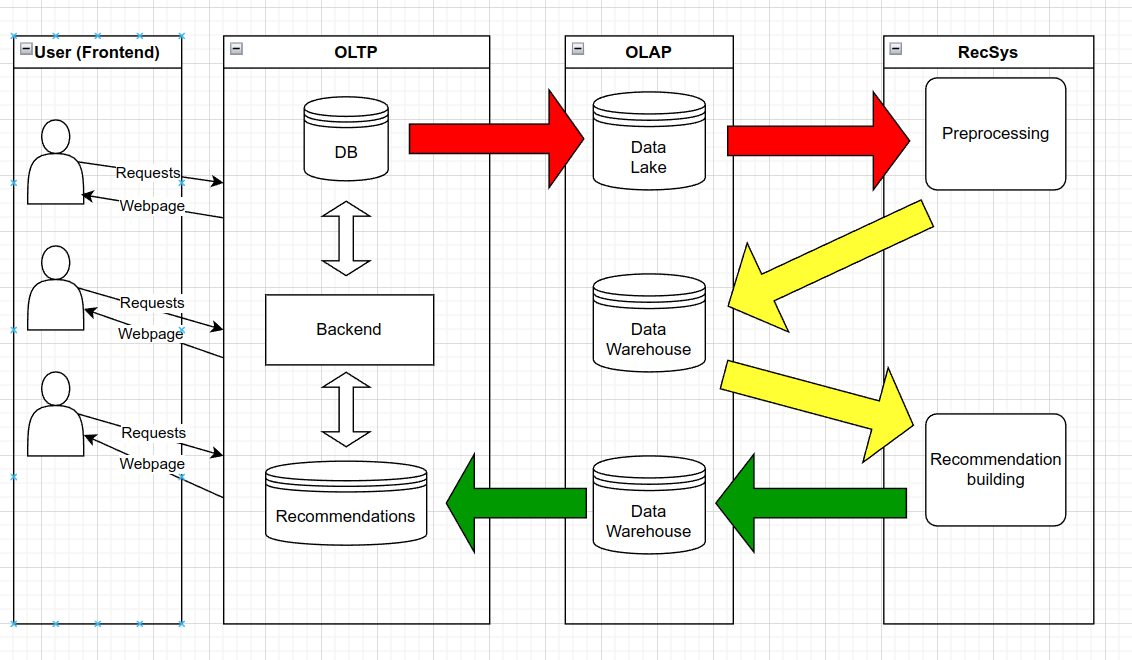